In [10]:
from IFD_tsne import *
from functools import partial
from utils import load_data, MidpointNormalize, equipotential_standard_normal, plot_heatmaps
from sklearn.datasets import make_blobs, make_spd_matrix
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from tueplots import figsizes, fonts, bundles
from tueplots import cycler
from tueplots.constants import markers
from tueplots.constants.color import palettes
import tsne_jax
import time

# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 150})
from jax.config import config
config.update("jax_enable_x64", True)

# Create dataset

In [11]:
#X, y = make_blobs(n_samples=50, n_features=50, centers=4, random_state=0, shuffle=False, cluster_std=3)
X, y = load_data(50)
key = random.PRNGKey(42)
y_guess = random.normal(key, shape=(X.shape[0], 2))
Y_star = tsne_fwd(X, y_guess)
X_flat, X_unflattener = flatten_util.ravel_pytree(X)   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)   # row-wise
primals = (X_flat, Y_flat)
KL_divergence_fun = partial(KL_divergence, X_unflattener=X_unflattener, Y_unflattener= Y_unflattener)

===> Finding 49 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds


In [13]:
print(X.shape, Y_star.shape)

(50, 50) (50, 2)


# Vector-Jacobian-product

In [12]:
v = np.eye(len(Y_flat))[0]
time_start = time.time()
dy_dx = V_d_y_star_d_x_P(KL_divergence_fun, primals, v, 5)
time_end = time.time()
print(time_end - time_start)

Compute v2
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Compute v3
Computing pairwise distances...
Starting binary search
Entered binary search function
12.292412519454956


In [14]:
print(dy_dx.shape)


(2500,)


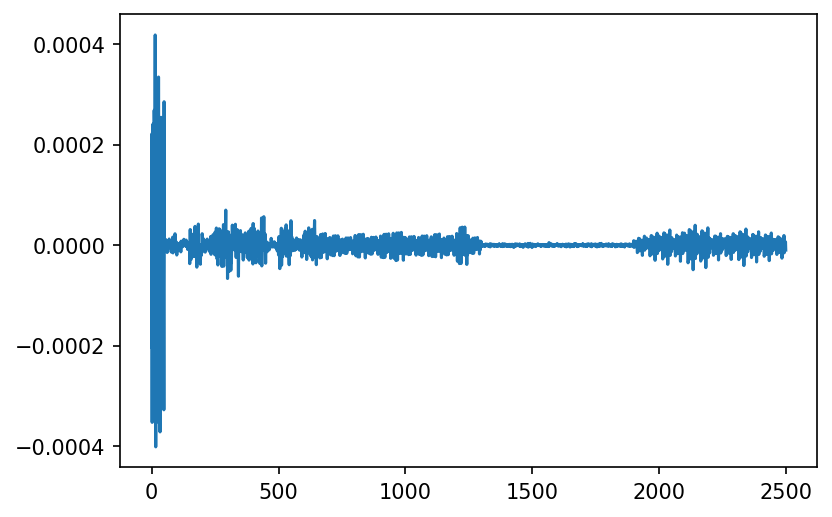

In [13]:
plt.plot(dy_dx[0])

In [26]:
time_start = time.time()
dy, H, J = d_y_star_d_x_outer(KL_divergence, X, Y_star)
time_end = time.time()
print(time_end - time_start)

Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function


2022-06-09 16:08:59.260795: W external/org_tensorflow/tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 74.50GiB (rounded to 80000000000)requested by op 
2022-06-09 16:08:59.261078: W external/org_tensorflow/tensorflow/core/common_runtime/bfc_allocator.cc:491] ***___********************_______________________________________________________________________**_
2022-06-09 16:08:59.261188: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2140] Execution of replica 0 failed: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 80000000000 bytes.
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation:  778.35MiB
              constant allocation:         0B
        maybe_live_out allocation:   74.89GiB
     preallocated temp allocation:         0B
                 total allocation:   75.65GiB
              total fragmentation:         0B (0.00%)
Peak bu

RuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 80000000000 bytes.
BufferAssignment OOM Debugging.
BufferAssignment stats:
             parameter allocation:  778.35MiB
              constant allocation:         0B
        maybe_live_out allocation:   74.89GiB
     preallocated temp allocation:         0B
                 total allocation:   75.65GiB
              total fragmentation:         0B (0.00%)
Peak buffers:
	Buffer 1:
		Size: 74.50GiB
		Operator: op_name="jit(vmap(jvp(vmap(jvp(fn)))))/jit(main)/mul" source_file="/mnt/qb/work/coe/szabel09/src/tsne/IFD_tsne.py" source_line=38
		XLA Label: fusion
		Shape: f64[5000,200,100,100]
		==========================

	Buffer 2:
		Size: 381.47MiB
		Entry Parameter Subshape: f64[5000,100,100]
		==========================

	Buffer 3:
		Size: 381.47MiB
		Entry Parameter Subshape: f64[5000,100,100]
		==========================

	Buffer 4:
		Size: 381.47MiB
		Operator: op_name="jit(vmap(jvp(vmap(jvp(fn)))))/jit(main)/add_any" source_file="/mnt/qb/work/coe/szabel09/src/tsne/IFD_tsne.py" source_line=38
		XLA Label: fusion
		Shape: f64[5000,100,100]
		==========================

	Buffer 5:
		Size: 15.26MiB
		Entry Parameter Subshape: f64[200,100,100]
		==========================

	Buffer 6:
		Size: 15.26MiB
		Operator: op_name="jit(vmap(jvp(vmap(jvp(fn)))))/jit(main)/mul" source_file="/mnt/qb/work/coe/szabel09/src/tsne/IFD_tsne.py" source_line=38
		XLA Label: fusion
		Shape: f64[200,100,100]
		==========================

	Buffer 7:
		Size: 78.1KiB
		Entry Parameter Subshape: f64[100,100]
		==========================

	Buffer 8:
		Size: 78.1KiB
		Operator: op_name="jit(vmap(jvp(vmap(jvp(fn)))))/jit(main)/mul" source_file="/mnt/qb/work/coe/szabel09/src/tsne/IFD_tsne.py" source_line=38
		Entry Parameter Subshape: f64[100,100]
		==========================

	Buffer 9:
		Size: 78.1KiB
		Operator: op_name="jit(vmap(jvp(vmap(jvp(fn)))))/jit(main)/mul" source_file="/mnt/qb/work/coe/szabel09/src/tsne/IFD_tsne.py" source_line=38
		XLA Label: multiply
		Shape: f64[100,100]
		==========================

	Buffer 10:
		Size: 32B
		XLA Label: tuple
		Shape: (f64[100,100], f64[200,100,100], f64[5000,100,100], f64[5000,200,100,100])
		==========================



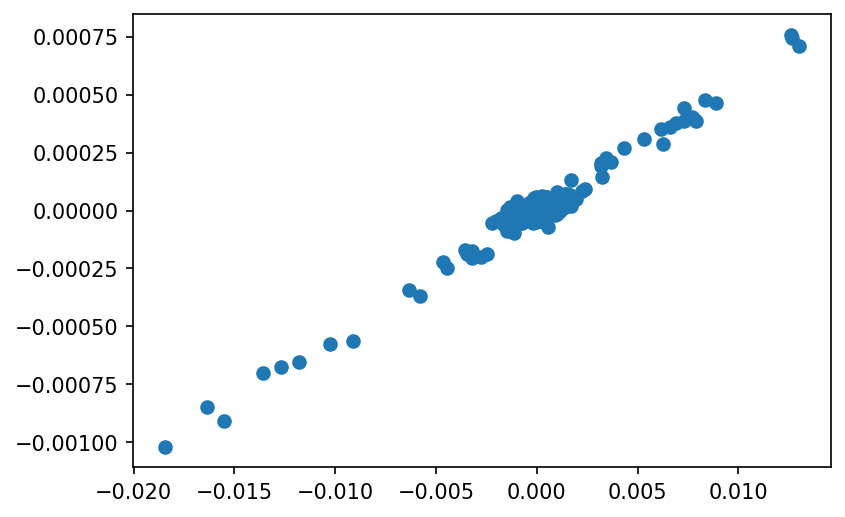

In [19]:
plt.scatter(dy[1], dy_dx[1])

(100, 2500)


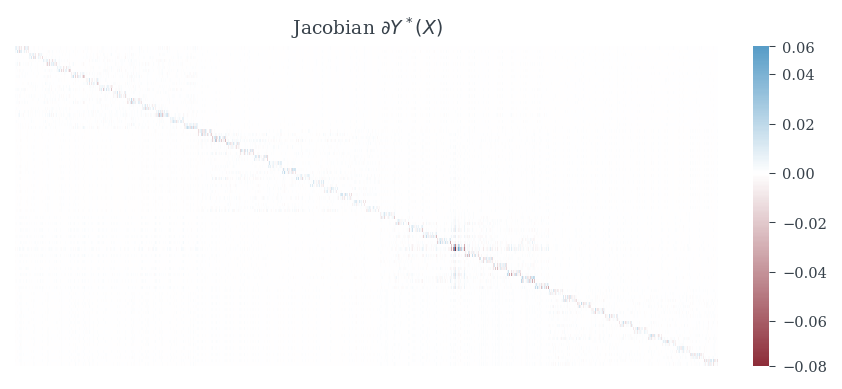

In [12]:
print(dy.shape)
plot_heatmaps(dy)

# Jacobian-Vector-product & Neumann approximation of Hessian

In [5]:
v = random.normal(key, shape=(X_flat.shape))
v = np.eye(len(X_flat))[1]
time_start = time.time()
final_tangents_out = d_y_star_d_x_VP(KL_divergence_fun, primals, v, 5)
time_end = time.time()
print(time_end - time_start)

NameError: name 'KL_divergence_fun' is not defined

In [46]:
print(final_tangents_out)

[ 2.21538733e-04  2.07011043e-04 -6.43581135e-06 -7.27685030e-06
 -2.27105678e-06  7.96804079e-06 -4.78502740e-06  4.38414360e-06
 -9.35411418e-06 -9.18108591e-06 -2.41226814e-05 -2.41282537e-05
 -1.23380354e-05  2.59263828e-05  3.65474663e-06  1.17554443e-05
 -1.92378089e-05 -2.35752149e-05 -1.95638164e-06  1.21466975e-06
 -4.61171532e-06  3.72339132e-06 -3.36388380e-06 -3.82576460e-06
 -8.91655533e-06 -7.26839220e-06 -3.07115166e-06 -4.14114078e-06
 -2.71283927e-06 -4.56136569e-06 -2.47891717e-06 -1.85919648e-06
 -5.72420116e-06 -5.49866999e-06 -7.08324627e-06 -3.58918083e-06
  2.96036356e-06  3.96679681e-07 -7.25556014e-07 -2.64991571e-06
  4.75517003e-07 -2.04901440e-06 -3.83375858e-06 -4.05348720e-06
  2.37667064e-06 -1.82459760e-07 -1.73406034e-06 -2.39382742e-06
 -9.13244708e-06 -7.73610097e-06  1.79781198e-06 -4.85691787e-07
 -1.07487873e-06 -1.96084455e-05 -2.74134330e-06 -8.03674920e-06
  1.47595226e-06 -1.99722266e-05 -1.26787604e-06 -2.14551657e-05
  5.43082467e-07 -1.44030

In [14]:
time_start = time.time()
dy, H, J = d_y_star_d_x_outer(KL_divergence, X, Y_star)
final_tangents_out_computed = dy @ v
time_end = time.time()
print(time_end - time_start)

Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
8.625607252120972


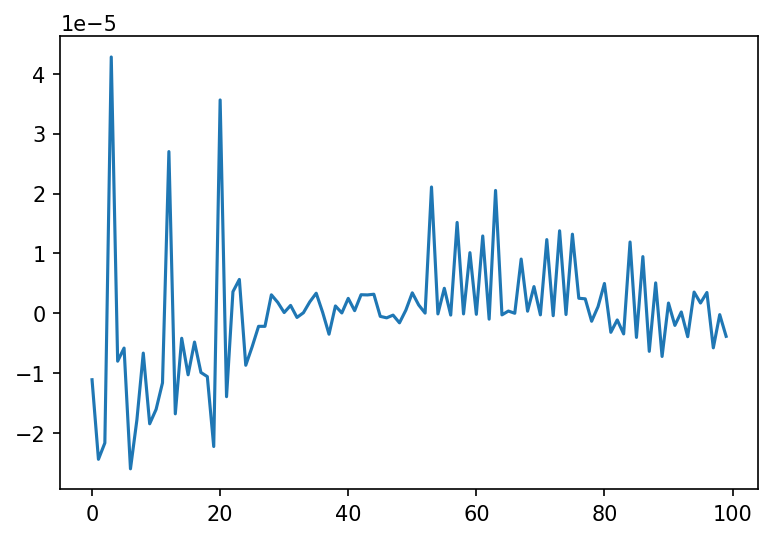

In [15]:
plt.plot(final_tangents_out)

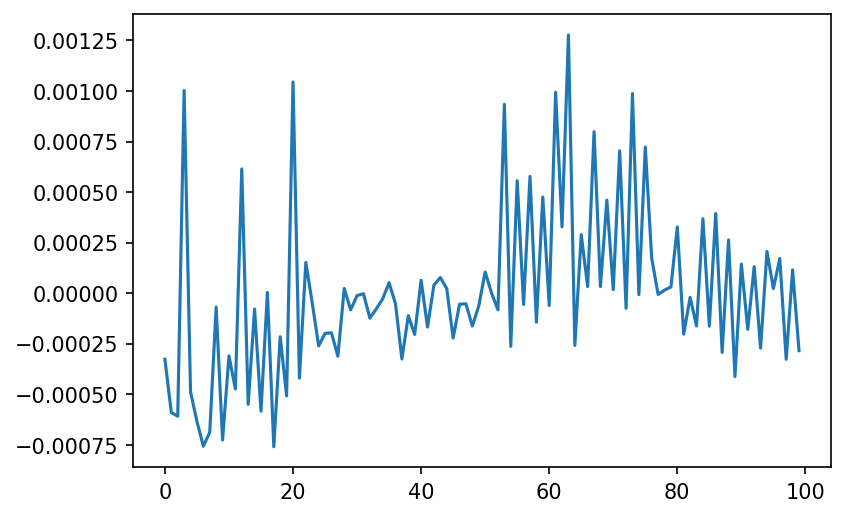

In [16]:
plt.plot(final_tangents_out_computed)

In [14]:
def HVP(f, primals, v):
    X, Y = primals
    first = lambda Y: jacfwd(f, argnums=1)(X, Y)
    return jvp(first, (Y,), (v,))[1]

# Jacobian matrix product

In [3]:
M = np.eye(len(X_flat))
time_start = time.time()
dy_dx = M_d_y_star_d_x_P(KL_divergence_fun, primals, M, 5)
time_end = time.time()
print(time_end - time_start)

TypeError: KL_divergence() missing 1 required positional argument: 'Y_flat'

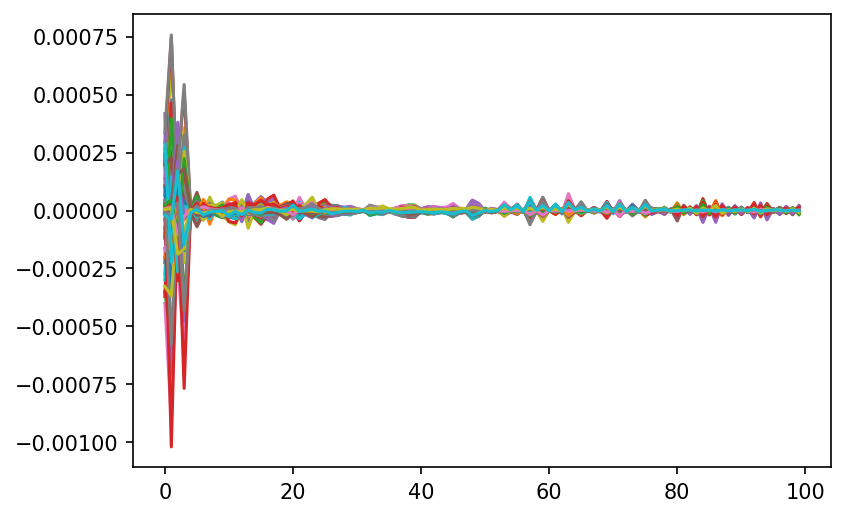

In [24]:
for i in dy_dx:
    plt.plot(i)

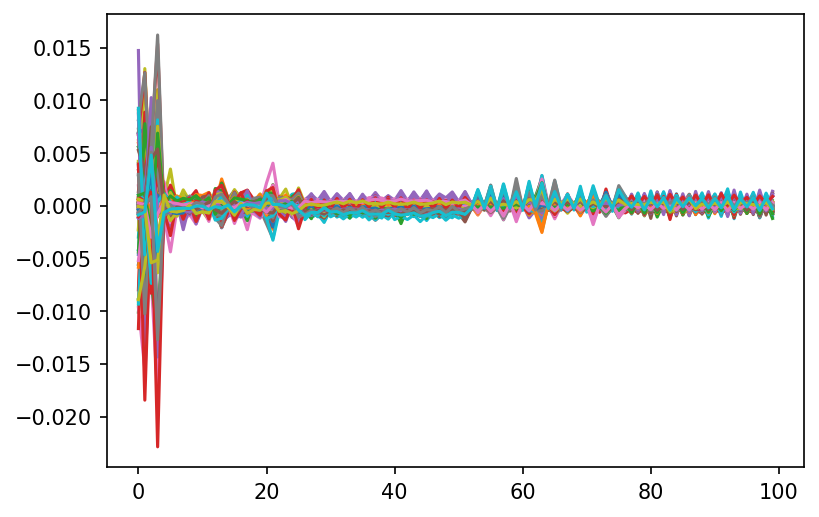

In [25]:
for i in np.transpose(dy[:, 0:100]):
    plt.plot(i)

In [45]:
KL_divergence_fun = partial(KL_divergence, X_unflattener=X_unflattener, Y_unflattener= Y_unflattener)
v = random.normal(key, shape=(Y_flat.shape))
V = np.eye(len(Y_flat))
H = Hessian_y_y(KL_divergence, X, Y_star)
H += 1e-5*np.eye(len(H))
approx_invhvp = approxInverseHVP(KL_divergence_fun, primals, v, H)
approx_invhvp2 = approxInverseHVP_2(KL_divergence_fun, primals, v)
#stack = []
#for i in V:
#    hvp = approxInverseHVP(KL_divergence_fun, primals, i, H)
#    stack.append(hvp)

Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search

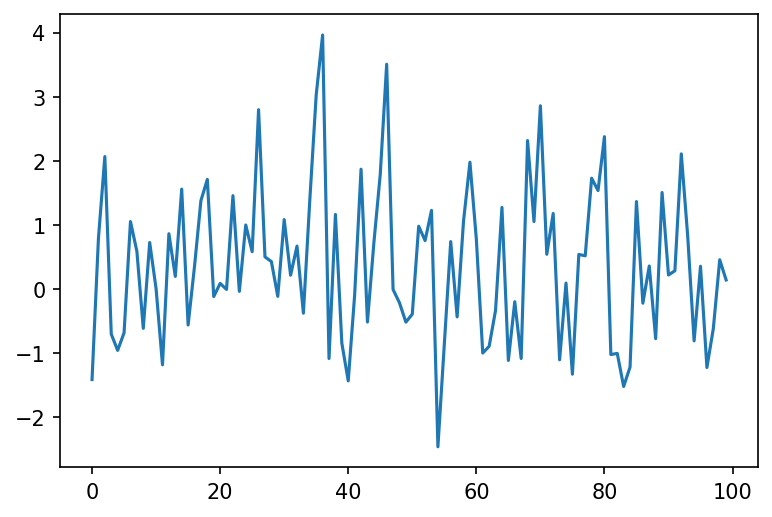

In [46]:
plt.plot(approx_invhvp)

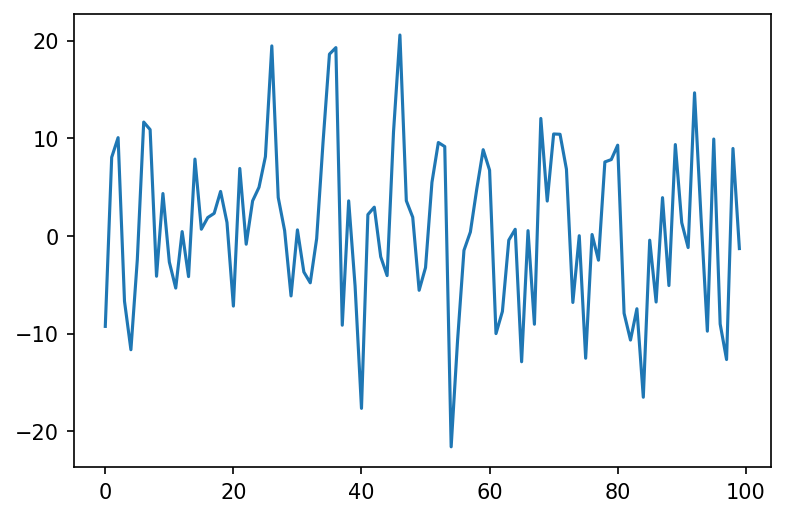

In [47]:
plt.plot(approx_invhvp2)

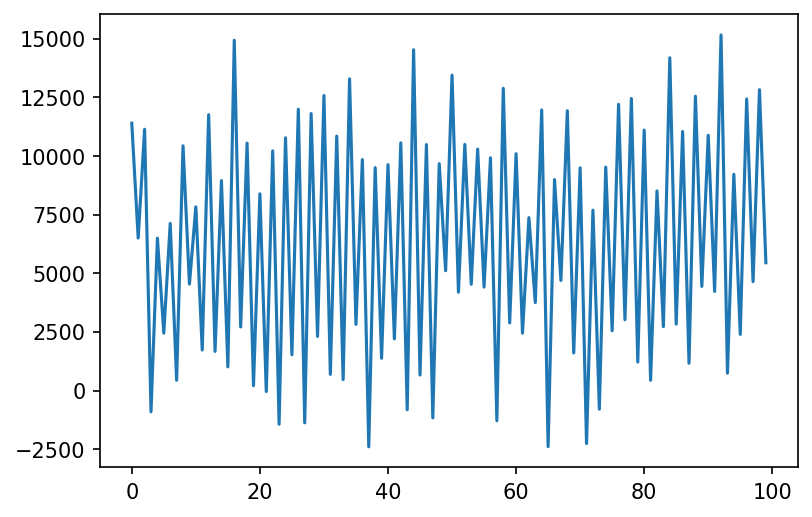

In [32]:
plt.plot(np.linalg.inv(H) @ v)

[[-2.57818919e+13 -4.83057656e+11 -1.75047680e+11 ... -3.43156221e+11
   1.45013244e+12  4.97221847e+11]
 [-4.83057656e+11 -6.25559238e+13 -1.26899737e+11 ...  2.56880785e+12
   2.22036715e+12  3.61968599e+12]
 [-1.75047680e+11 -1.26899737e+11 -1.94812914e+13 ...  3.26159006e+11
   5.66091834e+10  1.23735329e+11]
 ...
 [-3.43156221e+11  2.56880785e+12  3.26159006e+11 ... -1.54188767e+13
   6.10733872e+09  4.64811243e+12]
 [ 1.45013244e+12  2.22036715e+12  5.66091834e+10 ...  6.10733872e+09
  -2.47982160e+13  3.61919122e+12]
 [ 4.97221847e+11  3.61968599e+12  1.23735329e+11 ...  4.64811243e+12
   3.61919122e+12 -3.90385169e+13]]


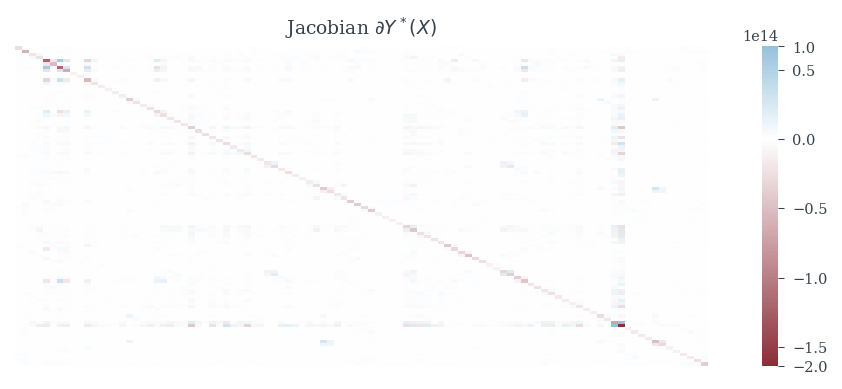

In [24]:
#print(stack)
approx_inverse = np.vstack(stack)
plot_heatmaps(approx_inverse)

In [115]:
hvp = HVP(KL_divergence_fun, primals, v)

Computing pairwise distances...
Starting binary search
Entered binary search function


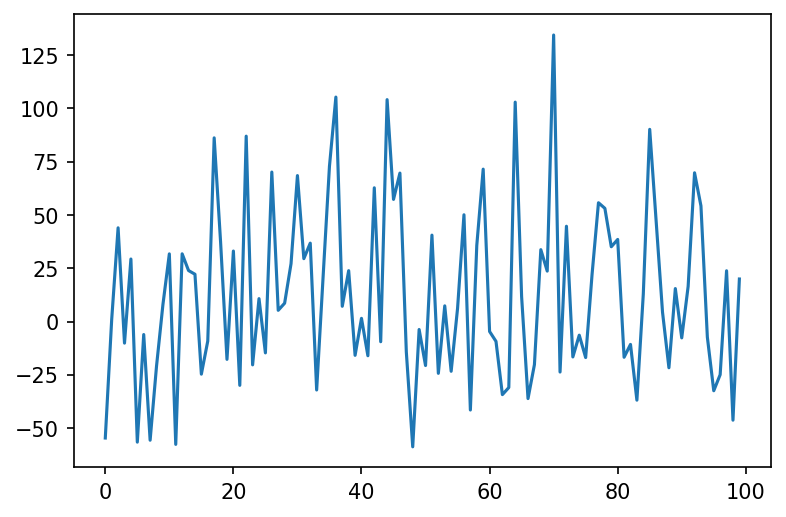

In [36]:
H_inv = approx_inv(H, 5)
plt.plot(H_inv @ v)

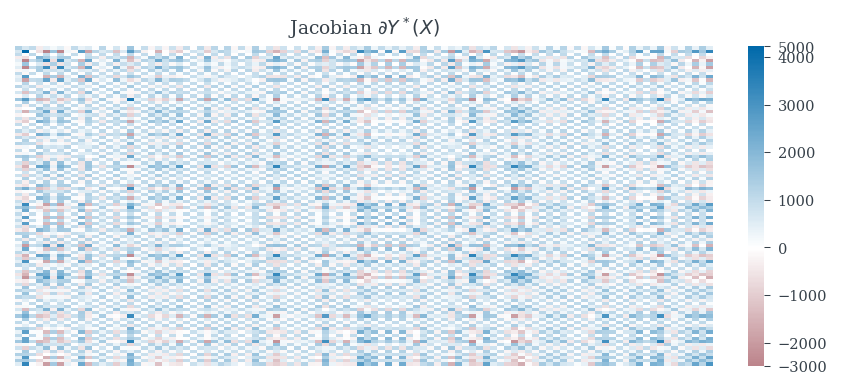

In [21]:
plot_heatmaps(np.linalg.inv(H+1e-5*np.eye(len(H))))

In [71]:
H = Hessian_y_y(KL_divergence, X, Y_star)
H += 1e-5*np.eye(len(H))

Computing pairwise distances...
Starting binary search
Entered binary search function


In [13]:
np.linalg.norm(H)

DeviceArray(0.16704088, dtype=float64)

In [76]:
H_inv_approx = approx_inv(H, 5)

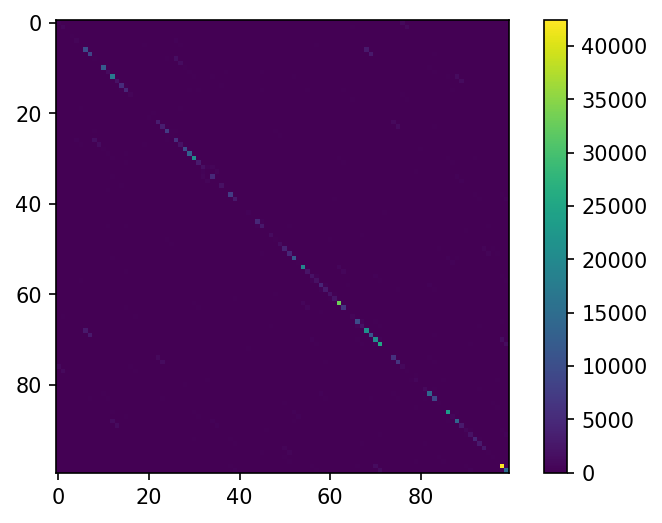

In [77]:
plt.imshow(H_inv_approx)
plt.colorbar()

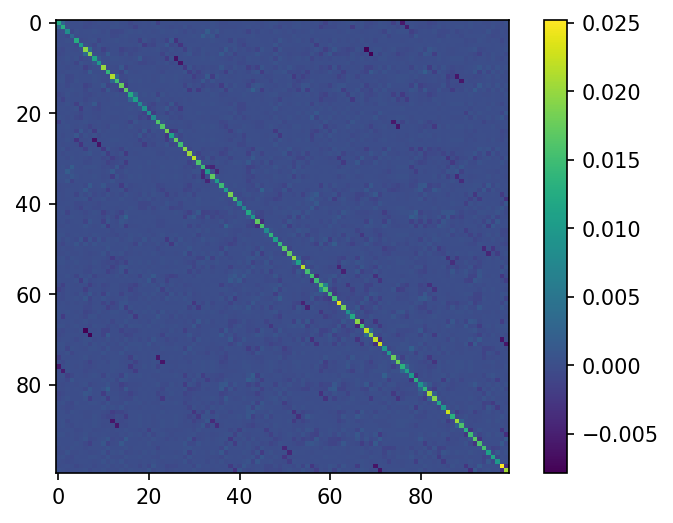

In [22]:
plt.imshow(H)
plt.colorbar()

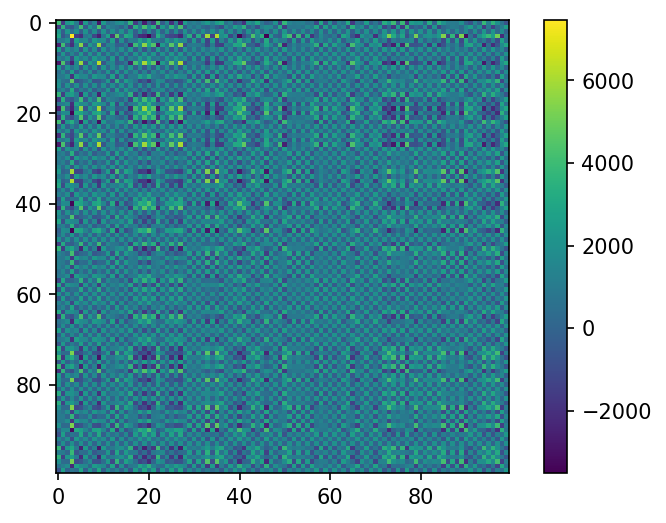

In [34]:
plt.imshow(np.linalg.inv(H))
plt.colorbar()

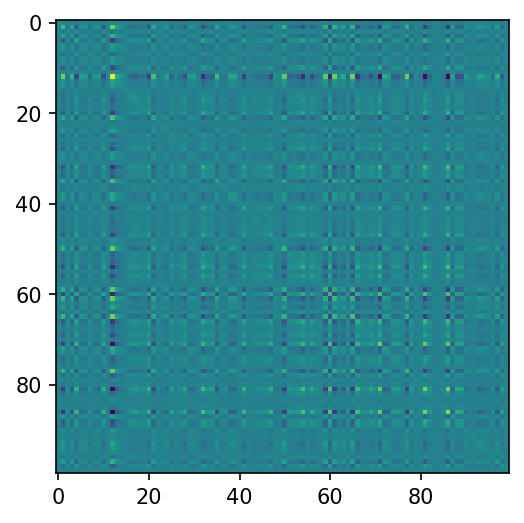

In [65]:
M = make_spd_matrix(100)
plt.imshow(M)

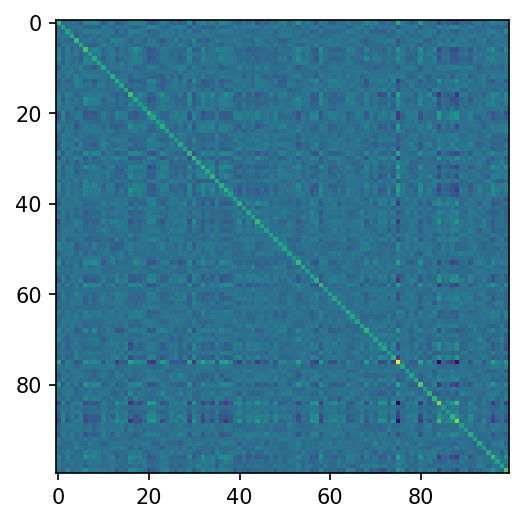

In [66]:
plt.imshow(np.linalg.inv(M))

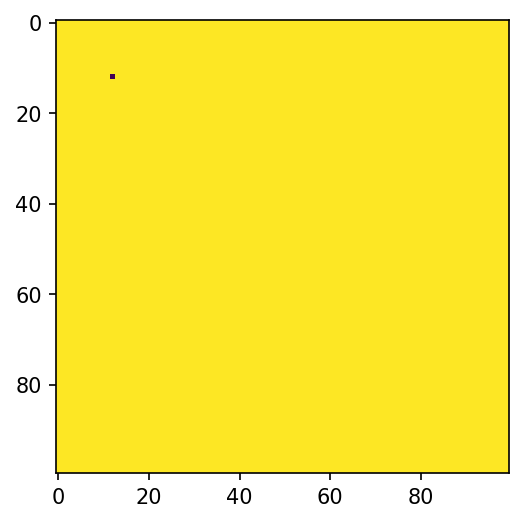

In [69]:
plt.imshow(approx_inv(M, 100))


# Inverse Hessian vector product

# Using derivative of KL-divergence w.r.t. y as an input function

In [2]:
#X, y = make_blobs(n_samples=50, n_features=50, centers=4, random_state=0, shuffle=False, cluster_std=3)
X, y = load_data(50)
key = random.PRNGKey(42)
y_guess = random.normal(key, shape=(X.shape[0], 2))
Y_star = tsne_fwd(X, y_guess)
X_flat, X_unflattener = flatten_util.ravel_pytree(X)   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)   # row-wise
primals = (X_flat, Y_flat)
KL_divergence_derivative_fun = partial(KL_divergence_dy, X_unflattener=X_unflattener, Y_unflattener= Y_unflattener)

===> Finding 49 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.04 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds


In [3]:
v = random.normal(key, shape=(X_flat.shape))
v_0 = np.eye(len(X_flat))[0]
v_1 = np.eye(len(Y_flat))[0]
#vector_product_0 = d_y_star_d_x_VP_using_derivative(KL_divergence_derivative_fun, primals, v_0, 5)
vector_product_1 = V_d_y_star_d_x_P_using_derivative(KL_divergence_derivative_fun, primals, v_1, 5)
#vector_products = np.array([vector_product_0, vector_product_1])

Compute v2
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
(100,)
Compute v3
Computing pairwise distances...
Starting binary search
Entered binary search function


In [4]:
vector_product_1.shape

(2500,)

In [6]:
M = np.eye(len(X_flat))
time_start = time.time()
dy_dx = d_y_star_d_x_MP_using_derivative(KL_divergence_derivative_fun, primals, M, 5)
time_end = time.time()
print(time_end - time_start)

Compute v3
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function
16.58792209625244


In [7]:
print(dy_dx)

[[ 1.38485186e-02 -1.71550622e-02 -9.31024633e-05 ...  1.04075908e-03
  -4.79342245e-04 -1.54879865e-04]
 [ 1.69777776e-02  3.32185229e-03  1.68682583e-04 ... -6.10351781e-04
  -7.52366362e-04 -9.59245360e-04]
 [ 1.91578432e-02  1.74028625e-02  3.42252813e-05 ...  1.31374290e-04
   7.77558100e-05  2.64718612e-04]
 ...
 [-1.29806906e-04 -2.37062950e-04 -8.78796753e-06 ...  4.16272467e-05
  -1.77358465e-04  2.09073988e-04]
 [ 6.31293498e-05  1.32834961e-04 -1.14748031e-05 ...  6.91565515e-05
   1.36391353e-04 -1.32516857e-03]
 [ 1.06926755e-04  2.13637446e-04 -1.14869581e-05 ...  8.73713658e-05
  -8.87242484e-05 -7.76444180e-04]]


In [8]:
KL_divergence_fun = partial(KL_divergence, X_unflattener=X_unflattener, Y_unflattener= Y_unflattener)

In [9]:
time_start = time.time()
final_tangents_out = d_y_star_d_x_VP(KL_divergence_fun, primals, v, 5)
time_end = time.time()
print(time_end - time_start)

Computing pairwise distances...
Starting binary search
Entered binary search function
[-8.86276685e-03  2.29262208e-04 -4.30409619e-03  6.03752564e-03
  7.88731694e-03 -1.48400641e-02 -1.24569919e-03  7.08755995e-03
 -4.73322419e-03  2.12016315e-03 -1.28864319e-02 -9.56973810e-03
  3.75243367e-03 -1.33879414e-04  1.30300434e-04 -4.54377471e-04
  3.26903624e-03  8.26017146e-03 -1.97481710e-05  2.12211947e-03
  4.57830280e-03 -2.27978811e-03 -8.86431996e-04  6.69276276e-03
 -3.04682554e-03  3.38292884e-03 -1.73800060e-03  2.05504246e-04
 -5.86237090e-03  2.24448001e-03 -6.14999525e-03  4.31385752e-03
  6.19673107e-03 -4.05139372e-03 -3.95607561e-03 -6.48488305e-03
  6.29057058e-03 -3.74360979e-05  9.69344458e-03 -1.19612780e-03
  7.73996954e-03 -7.41814042e-03  1.72748494e-03 -4.88813528e-03
  7.95419650e-04 -5.41731281e-03 -4.07019758e-03 -1.05236513e-02
 -1.62387785e-03  5.54471337e-03  6.41807709e-03 -7.72739839e-03
  3.93467434e-03 -7.13985419e-03  3.15341145e-03  2.20875722e-03
 -1.

In [7]:
M = np.eye(len(X_flat))
time_start = time.time()
dy_dx = d_y_star_d_x_MP(KL_divergence_fun, primals, M, 5)
time_end = time.time()
print(time_end - time_start)

Computing pairwise distances...
Starting binary search
Entered binary search function
Traced<ShapedArray(float64[100])>with<BatchTrace(level=1/0)> with
  val = DeviceArray([[ 2.95026350e-04, -1.68731287e-03, -4.14339926e-04, ...,
              -7.46996729e-06,  2.30336464e-05,  6.08660443e-05],
             [ 2.77329213e-03,  1.90058931e-05, -3.35612982e-04, ...,
              -5.21796986e-05, -2.72645189e-04,  2.45257654e-05],
             [ 7.25846343e-04, -1.99737572e-03, -1.85655266e-04, ...,
              -8.53658974e-05, -3.86257217e-05,  8.30838120e-05],
             ...,
             [ 2.25854199e-05,  9.88426691e-06, -1.96047779e-05, ...,
               5.68603120e-07, -1.05588225e-04,  1.71882250e-04],
             [-3.29801100e-05, -9.90478920e-05,  7.30993453e-06, ...,
               1.77934116e-05,  2.89797427e-04,  9.33873672e-04],
             [-5.87305459e-05, -4.92151737e-05, -2.64012391e-05, ...,
              -2.50364308e-06,  2.69727540e-04,  1.31718450e-04]],      

2022-07-26 10:24:57.836987: W external/org_tensorflow/tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.67GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


RuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 5016777216 bytes.